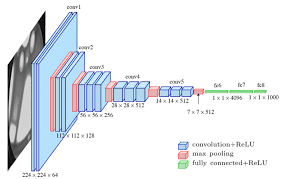

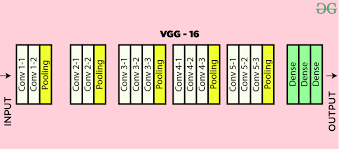

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import Sequential
from keras.datasets import cifar10

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [33]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [34]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [35]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [36]:
# Modifying VGG 16 architecture based on our problem dataset

model = Sequential()

# Because the image size is reduced from original VGG16 (224 to 32)
# we modify all the filters

# Block 1
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu',
                input_shape = (32, 32, 3)))
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# Block 2
# Change filters to (2 x 32 = 64)
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# Block 3
# Change filters to (2 x 64 = 128)
# Add one CNN layer
# We will get error because the image size is not capable to move
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
# We will get error because the image size is not capable to move
# model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# # Block 4
# # Change filters to (2 x 128 = 256)
# model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
# model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
# model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Block 5
# model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
# model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
# model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten and add the DNN
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,186 (1.37 MB)

 Trainable params: 358,186 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [38]:
history = model.fit(x_train, y_train, epochs = 10, 
                    batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.2731 - loss: 1.8993 - val_accuracy: 0.5042 - val_loss: 1.3735
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.5370 - loss: 1.2942 - val_accuracy: 0.5888 - val_loss: 1.1572
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.6092 - loss: 1.0990 - val_accuracy: 0.6275 - val_loss: 1.0573
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.6511 - loss: 0.9839 - val_accuracy: 0.6892 - val_loss: 0.8825
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.6887 - loss: 0.8909 - val_accuracy: 0.7096 - val_loss: 0.8351
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7068 - loss: 0.8335 - val_accuracy: 0.7252 - val_loss: 0.7841
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.7277 - loss: 0.7659 - val_accuracy: 0.7320 - val_loss: 0.7753
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.7423 - loss: 0.733

In [41]:
history = model.fit(x_train, y_train, epochs = 20, 
                    batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.7703 - loss: 0.6570 - val_accuracy: 0.7532 - val_loss: 0.7110
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.7744 - loss: 0.6375 - val_accuracy: 0.7630 - val_loss: 0.6950
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 109ms/step - accuracy: 0.7868 - loss: 0.6037 - val_accuracy: 0.7626 - val_loss: 0.6865
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.7840 - loss: 0.6056 - val_accuracy: 0.7407 - val_loss: 0.7731
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.7968 - loss: 0.5891 - val_accuracy: 0.7710 - val_loss: 0.6716
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.8003 - loss: 0.5683 - val_accuracy: 0.7626 - val_loss: 0.6876
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.8052 - loss: 0.5526 - val_accuracy: 0.7636 - val_loss: 0.7057
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.8064 - loss: 0.5504 

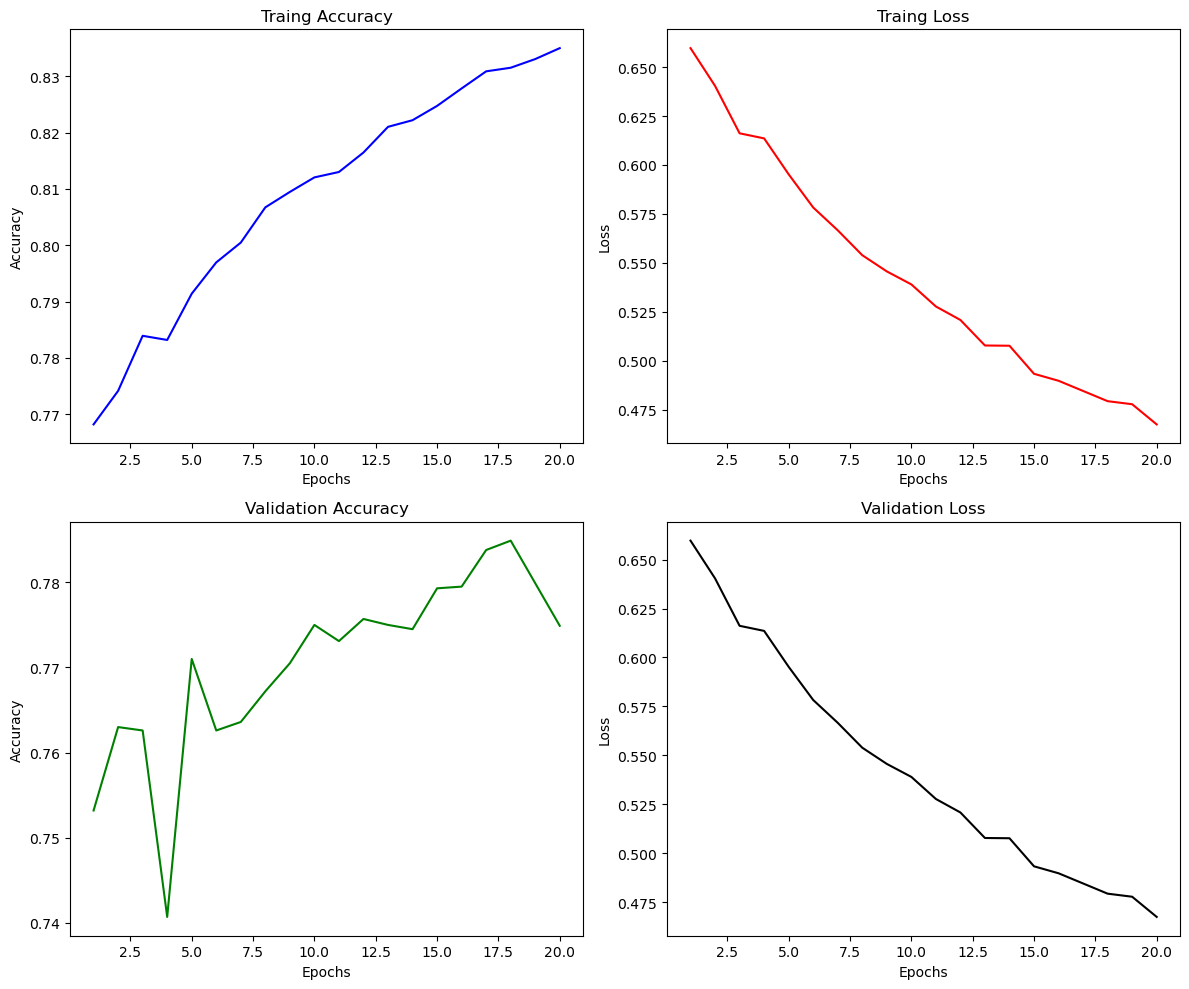

In [43]:
x = np.linspace(1, 20, 20)

fig, axs = plt.subplots(2, 2, figsize = (12, 10))

axs[0, 0].plot(x, history.history['accuracy'], 'b')
axs[0, 0].set_title('Traing Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')

axs[0, 1].plot(x, history.history['loss'], 'r')
axs[0, 1].set_title('Traing Loss')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')

axs[1, 0].plot(x, history.history['val_accuracy'], 'g')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')

axs[1, 1].plot(x, history.history['loss'], 'k')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')

plt.tight_layout()
plt.show()